In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install pickle-mixin
!pip install seaborn
!pip install Flask

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=aa4e1dccbb53cdb14d90c3653bbef09c008343077d8c9c05268ebdc831eeca41
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [2]:
import zipfile

with zipfile.ZipFile("/content/archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [3]:
import os

for file in os.listdir("/content"):
    if file.endswith(".csv"):
        print(file)

garments_worker_productivity.csv


In [5]:
import pandas as pd

df = pd.read_csv("/content/garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
# Shape and column names
print("Shape of the dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns)
# First few rows
df.head()


Shape of the dataset: (1197, 15)

Columns in dataset:
 Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [7]:
# Dataset info (types, nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
# Statistical summary
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
# Count of null values in each column
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


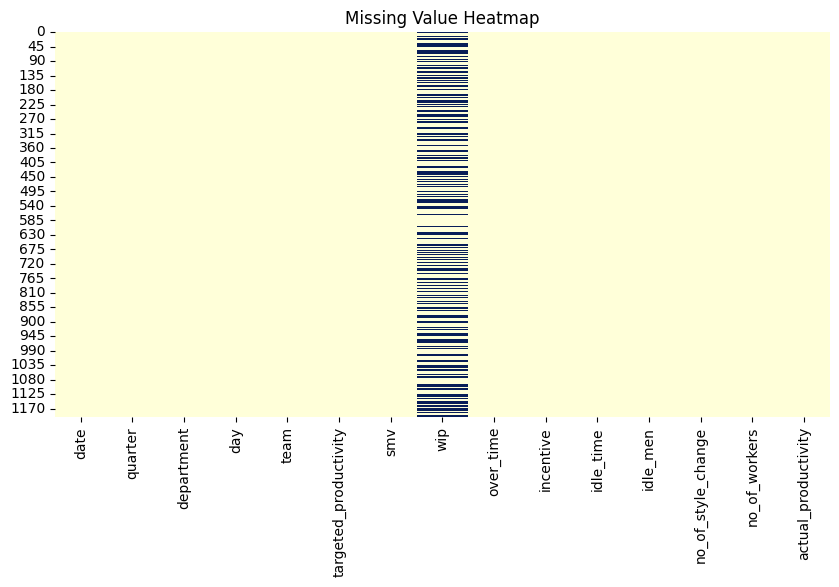

In [10]:
# Heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Value Heatmap")
plt.show()

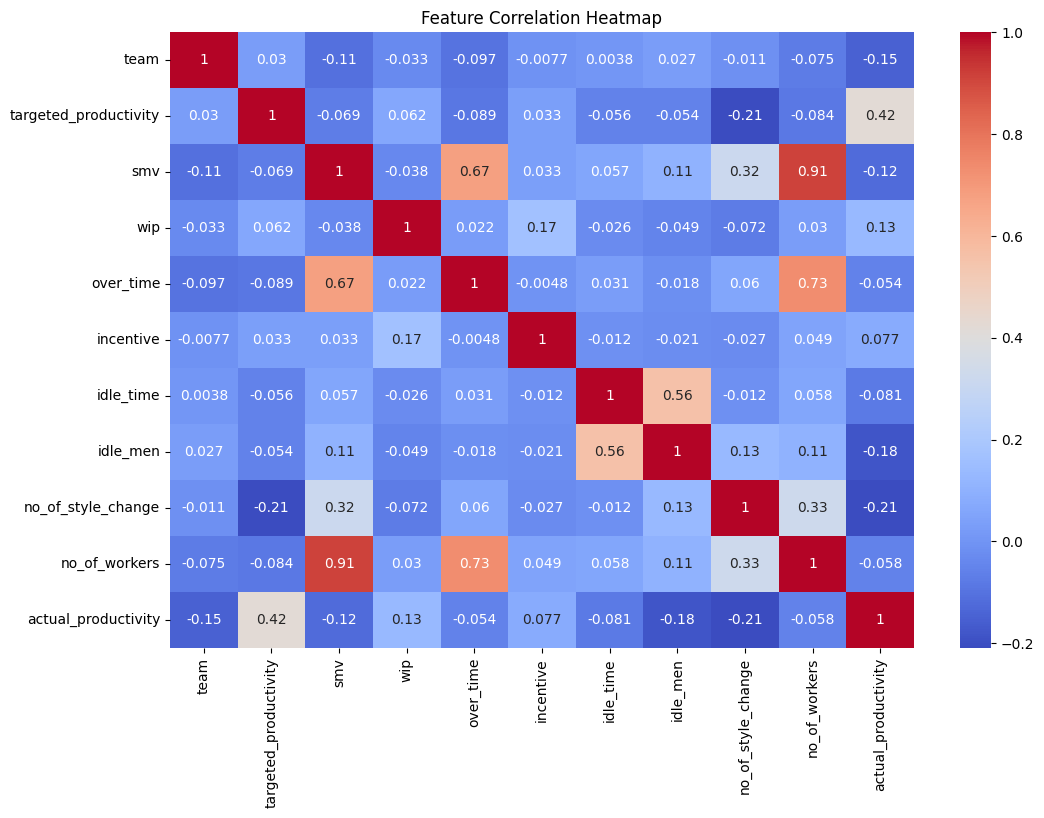

In [12]:
#Correlation Matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

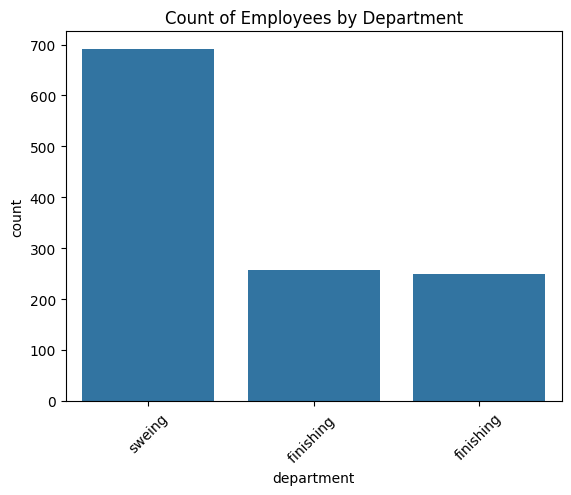

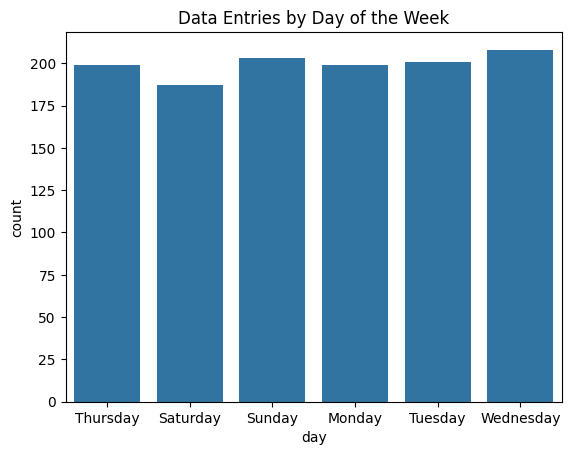

In [13]:
# Department distribution
sns.countplot(data=df, x='department')
plt.xticks(rotation=45)
plt.title("Count of Employees by Department")
plt.show()

# Day of the week
sns.countplot(data=df, x='day')
plt.title("Data Entries by Day of the Week")
plt.show()

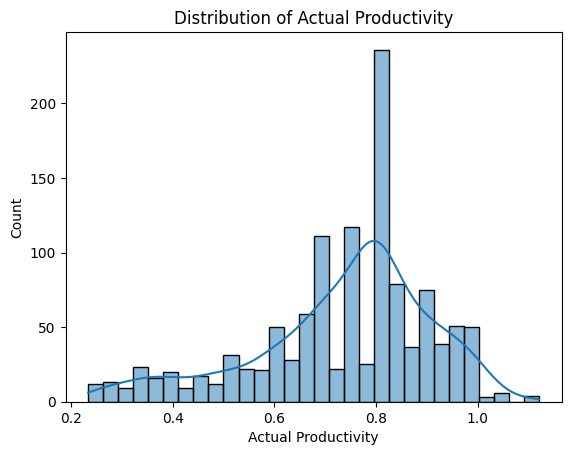

In [14]:
sns.histplot(df['actual_productivity'], kde=True, bins=30)
plt.title("Distribution of Actual Productivity")
plt.xlabel("Actual Productivity")
plt.show()

In [15]:
# View missing values
df.isnull().sum()
# Drop rows with missing values
df = df.dropna()

In [16]:
# Drop the 'date' column
df = df.drop('date', axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode

    def fit(self, X, y=None):
        self.encoders = {}
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(output[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [18]:
# Categorical columns
categorical_cols = ['quarter', 'department', 'day']

# Encode them
encoder = MultiColumnLabelEncoder(columns=categorical_cols)
df = encoder.fit_transform(df)

In [19]:
X = df.drop('actual_productivity', axis=1)  # All features
y = df['actual_productivity']                # Target variable

In [20]:
X = X.values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
!pip install xgboost

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [24]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_test = model_lr.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, pred_test)
mse_lr = mean_squared_error(y_test, pred_test)
r2_lr = r2_score(y_test, pred_test)

In [25]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

pred = model_rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, pred)
mse_rf = mean_squared_error(y_test, pred)
r2_rf = r2_score(y_test, pred)

In [26]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

pred3 = model_xgb.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)

In [28]:
print(" Linear Regression:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

print("\n Random Forest:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

print("\n XGBoost:")
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, R²: {r2_xgb}")

 Linear Regression:
MAE: 0.04341787163665828, MSE: 0.004138018740449661, R²: 0.8010228131946868

 Random Forest:
MAE: 0.02985691417762582, MSE: 0.0029274705345121604, R²: 0.8592321862347636

 XGBoost:
MAE: 0.030731378274945487, MSE: 0.0029248782575159327, R²: 0.8593568362222292


In [29]:
# Save best model using pickle
pickle.dump(model_xgb, open('model.pkl', 'wb'))

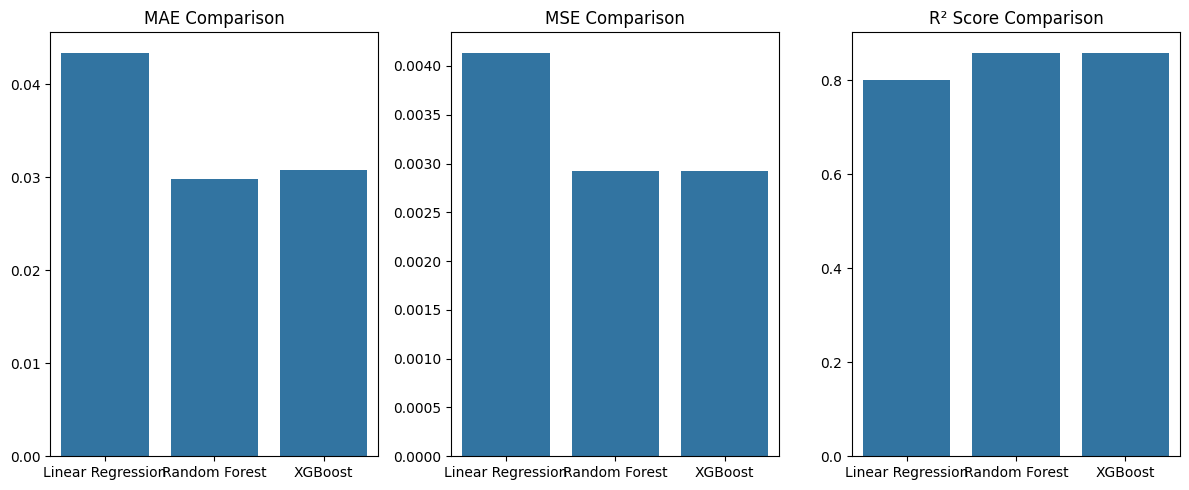

In [30]:
# Compare visually
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_values = [mae_lr, mae_rf, mae_xgb]
mse_values = [mse_lr, mse_rf, mse_xgb]
r2_values = [r2_lr, r2_rf, r2_xgb]

plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values)
plt.title("MAE Comparison")

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values)
plt.title("MSE Comparison")

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()

In [31]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>